In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Load the datasets

final_merged_df = pd.read_csv('data/final_merged_all_years.csv')
gender_df = pd.read_csv('data/gender_state.csv')
gender_year = pd.read_csv('data/gender_year.csv', skiprows=2)
race_df = pd.read_csv('data/Race-Ethnicity DiabetesAtlas_NationalData.csv', skiprows=2)

def is_numeric(x):
    try:
        float(x)
        return True
    except (ValueError, TypeError):
        return False
# Filter rows where the 'Year' column contains numeric values
final_merged_df = final_merged_df[final_merged_df['Year'].apply(is_numeric)]
race_df = race_df[race_df['Year'].apply(is_numeric)]

# Convert the 'Year' column values to integers
final_merged_df['Year'] = final_merged_df['Year'].astype('Int64')
race_df['Year'] = race_df['Year'].astype('Int64')


In [2]:
final_merged_df.head()

,Year,State,Rate,Deaths,Percentage,Lower Limit,Upper Limit,Diagnosed Diabetes (Percentage),Obesity (Percentage),Newly Diagnosed Diabetes (Rate per 1000),Newly Diagnosed Physical Inactivity (Percentage),18-44 percentage,45-64 percentage,65-74 percentage,75+ percentage
0,2000,Alabama,NaN,NaN,9.7,7.2,13,NaN,NaN,NaN,NaN,2.3,11.4,15.4,15.5
1,2000,Alaska,NaN,NaN,Suppressed,Suppressed,Suppressed,NaN,NaN,NaN,NaN,1.1,8.3,NaN,NaN
2,2000,Arizona,NaN,NaN,Suppressed,Suppressed,Suppressed,NaN,NaN,NaN,NaN,1.4,10.7,13.4,NaN
3,2000,Arkansas,NaN,NaN,8.5,5.8,12.3,NaN,NaN,NaN,NaN,2.2,8.7,12.7,12.5
4,2000,California,NaN,NaN,13.3,9.3,18.7,NaN,NaN,NaN,NaN,2.9,9.3,15.9,16.6


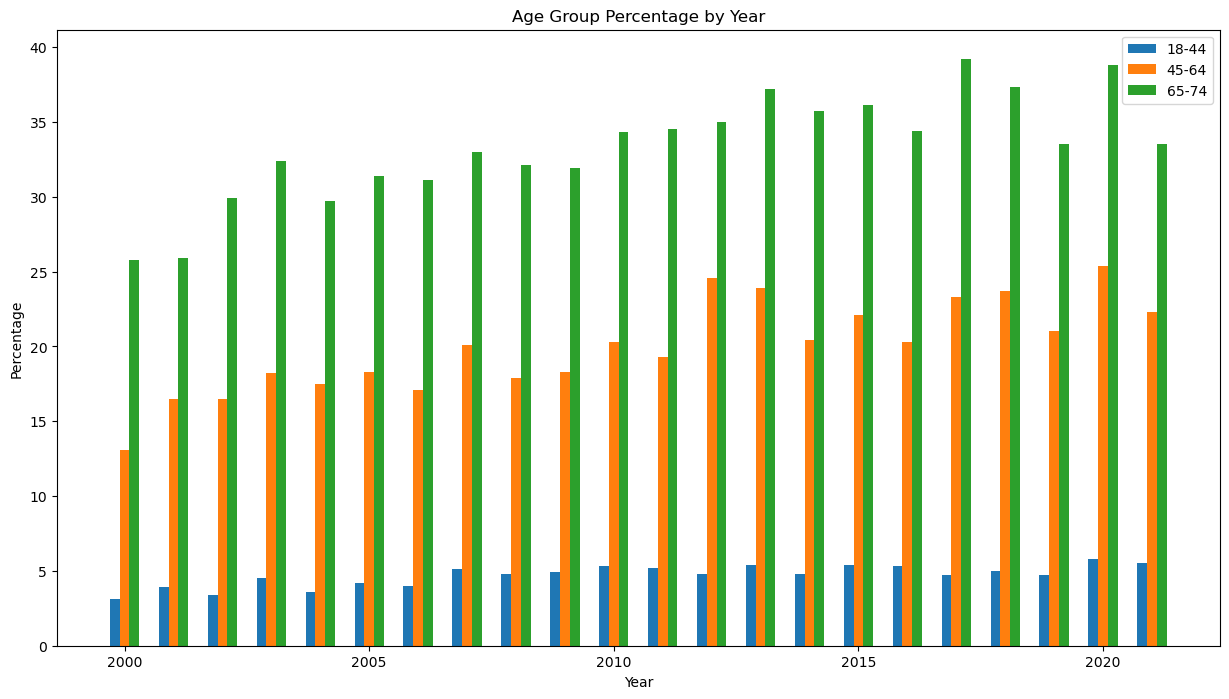

In [3]:
# Assuming final_merged_df_cleaned is your DataFrame
final_merged_df = final_merged_df.dropna(subset=['Year'])
final_merged_df['Year'] = final_merged_df['Year'].astype(int)

# Correcting the SettingWithCopyWarning issues by using .loc
final_merged_df.loc[:, 'Year'] = final_merged_df['Year'].astype(int)
final_merged_df.loc[:, '18-44 percentage'] = pd.to_numeric(final_merged_df['18-44 percentage'], errors='coerce').fillna(0)
final_merged_df.loc[:, '45-64 percentage'] = pd.to_numeric(final_merged_df['45-64 percentage'], errors='coerce').fillna(0)
final_merged_df.loc[:, '65-74 percentage'] = pd.to_numeric(final_merged_df['65-74 percentage'], errors='coerce').fillna(0)

# Filter the DataFrame for the years of interest
final_merged_filtered = final_merged_df[(final_merged_df['Year'] >= 2000) & (final_merged_df['Year'] <= 2021)]

# Create a figure and a set of subplots with an increased figure size
fig, ax = plt.subplots(figsize=(15, 8))

# Plotting each age group percentage by Year with a slight shift along the x-axis for clarity
ax.bar(final_merged_filtered['Year'] - 0.2, final_merged_filtered['18-44 percentage'], width=0.2, label='18-44', align='center')
ax.bar(final_merged_filtered['Year'], final_merged_filtered['45-64 percentage'], width=0.2, label='45-64', align='center')
ax.bar(final_merged_filtered['Year'] + 0.2, final_merged_filtered['65-74 percentage'], width=0.2, label='65-74', align='center')

# Customizing the plot
ax.set_xlabel('Year')
ax.set_ylabel('Percentage')
ax.set_title('Age Group Percentage by Year')
ax.legend()

plt.show()

In [4]:
race_df.head()

,Year,Hispanic - Percentage,Hispanic - Lower Limit,Hispanic - Upper Limit,Non-Hispanic White - Percentage,Non-Hispanic White - Lower Limit,Non-Hispanic White - Upper Limit,Non-Hispanic Black - Percentage,Non-Hispanic Black - Lower Limit,Non-Hispanic Black - Upper Limit,Non-Hispanic Asian - Percentage,Non-Hispanic Asian - Lower Limit,Non-Hispanic Asian - Upper Limit
0,2000,8.8,7.9,9.8,5.2,4.9,5.5,10.1,9.1,11.1,4.5,2.9,6.9
1,2001,9.2,8.2,10.2,5.6,5.3,6.0,10.3,9.3,11.3,5.0,3.4,7.2
2,2002,9.2,8.2,10.4,5.8,5.4,6.1,9.9,8.9,10.9,6.2,4.6,8.4
3,2003,8.5,7.6,9.6,5.9,5.5,6.2,10.0,9.1,11.1,6.3,4.6,8.4
4,2004,10.1,9.1,11.2,6.0,5.7,6.3,11.1,10.1,12.1,7.5,5.8,9.7


In [5]:

df = final_merged_df
# Replace '' with the name of the column you want to analyze
target_column = 'Deaths'

# Convert the 'Year' column to numeric, round it, and fill non-numeric values with NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').round().astype('Int64')

# Convert the 'target_column' to numeric, round it, and fill non-numeric values with NaN
df[target_column] = pd.to_numeric(df[target_column], errors='coerce')

# Filter rows where both the 'Year' and target column are not NaN
numeric_df = df[df['Year'].notna() & df[target_column].notna()]

# Group the data by 'Year'
grouped = numeric_df.groupby(['Year'])

# Define the statistical measures you want to calculate for the target column
agg_functions = {
    target_column: ['mean', 'median', 'std', 'min', 'max'],
}

# Perform the statistical analysis and store the results in a new DataFrame
result_df = grouped.agg(agg_functions)

# Reset the index to make the 'Year' column a regular column
result_df = result_df.reset_index()

# Display the statistical analysis results
print(result_df)

   Year       Deaths                                     
                mean  median          std    min      max
0  2005   436.608696   336.0   243.987842   93.0    824.0
1  2014   417.952381   350.0   244.875372  110.0    835.0
2  2015   437.428571   403.0   242.711675  136.0    887.0
3  2016   472.363636   419.0   276.706230  112.0    938.0
4  2017   445.650000   367.0   258.935732  121.0    918.0
5  2018  1696.040000  1266.0  1785.302718  122.0   9506.0
6  2019  1750.380000  1286.0  1862.183871  111.0   9854.0
7  2020  2040.300000  1476.5  2204.126985  148.0  11642.0
8  2021  2062.600000  1556.0  2208.336820  158.0  11440.0


In [6]:

df = final_merged_df
state_column = 'State'
numeric_column = 'Newly Diagnosed Diabetes (Rate per 1000)'
numeric_value_label = 'Change in ' + numeric_column  # Define the label

# Convert the 'Year' column to numeric, round it, and fill non-numeric values with NaN
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').round().astype('Int64')

# Convert the 'Percentage' column to numeric, handling non-numeric values by setting them to NaN
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')

# Filter rows where both the 'Year' and 'Percentage' columns are not NaN
numeric_df = df[df['Year'].notna() & df[numeric_column].notna()]

# Get a list of all unique state values
unique_states = numeric_df[state_column].unique()

# Initialize an empty list to store dictionaries of results
results_list = []

# Iterate through each unique state and calculate the change as specified
for state in unique_states:
    state_data = numeric_df[numeric_df[state_column] == state]
    if len(state_data) > 1:  # Check if there are at least two numeric values to calculate change
        lowest_value = state_data[numeric_column].min()
        highest_value = state_data[numeric_column].max()
        change = highest_value - lowest_value
        results_list.append({state_column: state, numeric_value_label: change})

# Create a DataFrame from the list of dictionaries
results_df = pd.DataFrame(results_list)

# Sort the results DataFrame in descending order based on the 'Change in Percentage' column
results_df = results_df.sort_values(by=numeric_value_label, ascending=False)

# Display the sorted change in values for each state
print(results_df)

                   State  Change in Newly Diagnosed Diabetes (Rate per 1000)
13              Illinois                                                5.9 
10               Georgia                                                3.9 
48         West Virginia                                                3.7 
43                 Texas                                                3.7 
47            Washington                                                3.4 
11                Hawaii                                                3.2 
28                Nevada                                                3.2 
18             Louisiana                                                2.8 
3               Arkansas                                                2.6 
5               Colorado                                                2.5 
42             Tennessee                                                2.5 
9                Florida                                                2.5 

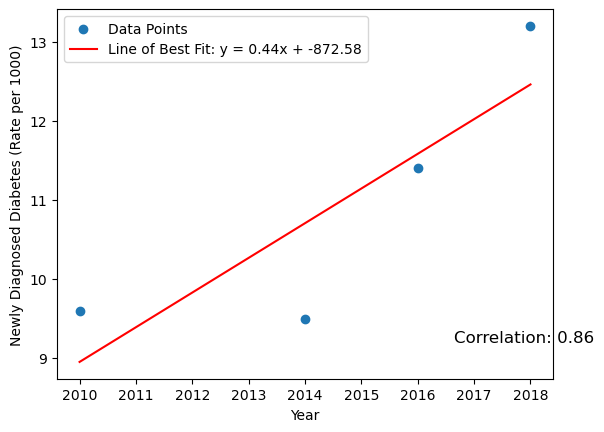

In [7]:

# Load your dataset (replace with your own dataset)
df = final_merged_df

# Specify the column names for the two variables you want to analyze
x_column = 'Year'  # Replace with your actual column name
y_column = 'Newly Diagnosed Diabetes (Rate per 1000)'  # Replace with your actual column name

# Specify the column name and value to filter by (optional)
filter_column = 'State'  # Replace with the column to filter by
filter_value = 'Texas'    # Replace with the value to filter for

# Convert columns to numeric, convert non-numeric values to NaN
df[x_column] = pd.to_numeric(df[x_column], errors='coerce')
df[y_column] = pd.to_numeric(df[y_column], errors='coerce')

# Remove rows with NaN values in either column
df = df.dropna(subset=[x_column, y_column])

# Optionally, filter the data based on another column
if filter_column and filter_value:
    df = df[df[filter_column] == filter_value]

# Extract the data from the DataFrame
x_data = df[x_column].astype(float)  # Ensure the data type is float
y_data = df[y_column].astype(float)  # Ensure the data type is float

# Create a scatterplot
plt.scatter(x_data, y_data, label='Data Points')

# Calculate the line of best fit (linear regression)
slope, intercept = np.polyfit(x_data, y_data, 1)
line_of_best_fit = slope * x_data + intercept

# Calculate the correlation coefficient (Pearson correlation)
correlation_coefficient, _ = pearsonr(x_data, y_data)

# Plot the line of best fit and add the equation to the plot
plt.plot(x_data, line_of_best_fit, color='red', label=f'Line of Best Fit: y = {slope:.2f}x + {intercept:.2f}')

# Add the correlation coefficient to the plot
plt.text(0.8, 0.1, f'Correlation: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=12)

# Add labels and legend
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.legend()

# Show the plot
plt.show()

In [8]:

# Specify the columns to calculate the difference for
columns_to_calculate = ['Hispanic - Percentage', 'Non-Hispanic White - Percentage', 'Non-Hispanic Black - Percentage', 'Non-Hispanic Asian - Percentage']

# Round the 'Year' column to the nearest whole number and convert it to integers
race_df['Year'] = pd.to_numeric(race_df['Year'], errors='coerce').round().astype('Int64')

# Filter out non-numeric rows based on the 'Year' column
race_df = race_df.dropna(subset=['Year'])

# Initialize an empty list to store the differences
differences = []

# Calculate the difference for each specified column
for column in columns_to_calculate:
    max_value = race_df[column].max()
    min_value = race_df[column].min()
    
    # Calculate the difference between max and min
    diff = max_value - min_value
    
    # Append the results to the list
    differences.append({'Column': column, 'Change': diff})

# Create a DataFrame from the list of differences
differences_df = pd.DataFrame(differences)

# Sort the DataFrame by the 'Change' column in descending order
differences_df = differences_df.sort_values(by='Change', ascending=False)

print("Differences between the highest and lowest values for each column (sorted by Change in descending order):")
print(differences_df)

Differences between the highest and lowest values for each column (sorted by Change in descending order):
                            Column  Change
3  Non-Hispanic Asian - Percentage     5.7
0            Hispanic - Percentage     4.5
2  Non-Hispanic Black - Percentage     3.1
1  Non-Hispanic White - Percentage     2.6


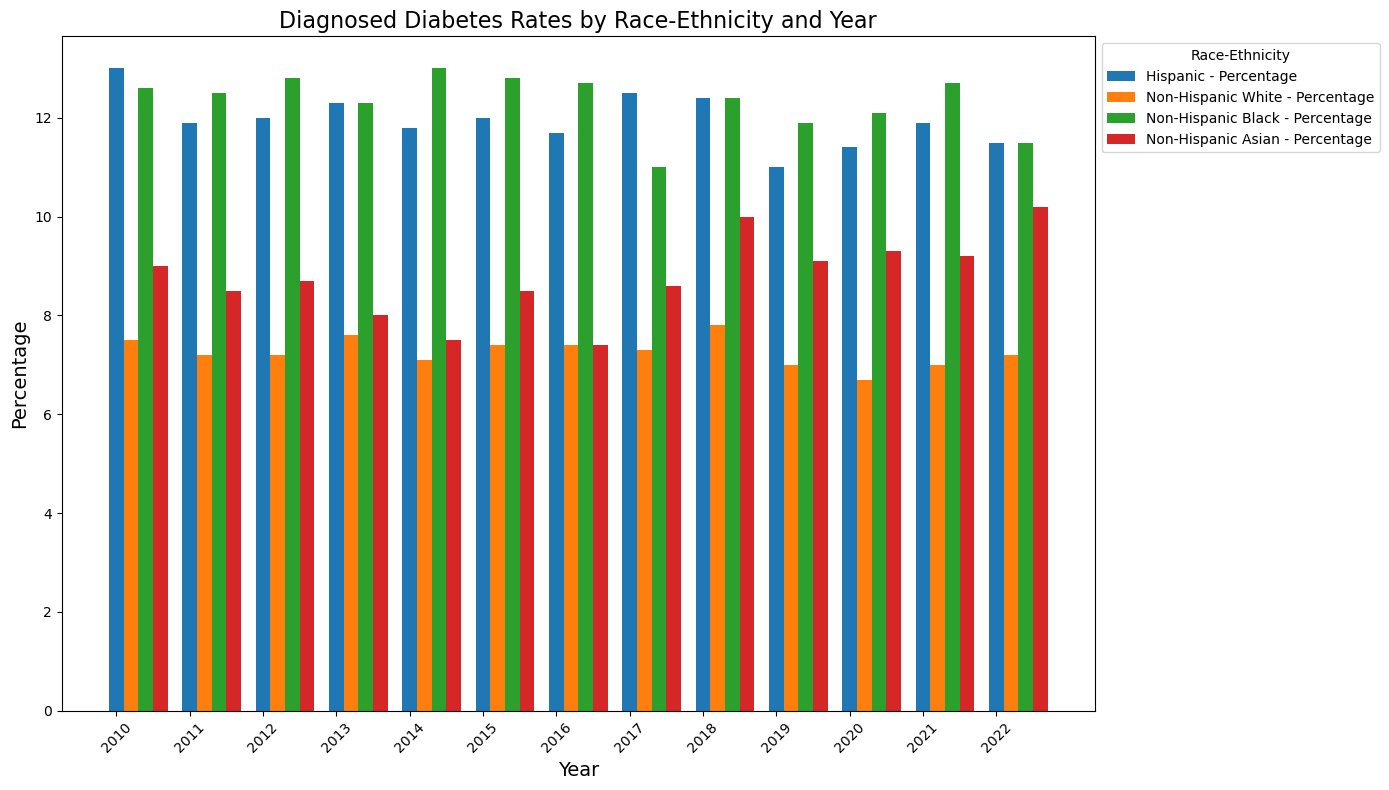

In [14]:
race_df = race_df.iloc[2:]  # Adjust this as necessary based on the actual data structure
race_df = race_df[pd.to_numeric(race_df['Year'], errors='coerce').notnull()] 
race_df['Year'] = race_df['Year'].astype(int)
fig, ax = plt.subplots(figsize=(14, 8))

# The correct approach: Plot each race-ethnicity percentage directly
race_ethnicity_columns = [
    'Hispanic - Percentage', 
    'Non-Hispanic White - Percentage', 
    'Non-Hispanic Black - Percentage', 
    'Non-Hispanic Asian - Percentage'
]

# Iterate over each race-ethnicity group and plot its data
for column in race_ethnicity_columns:
    ax.bar(race_df['Year'] + race_ethnicity_columns.index(column)*0.2, race_df[column], width=0.2, label=column)

# Adding title and labels
ax.set_title('Diagnosed Diabetes Rates by Race-Ethnicity and Year', fontsize=16)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Percentage', fontsize=14)
ax.set_xticks(race_df['Year'])
ax.set_xticklabels(race_df['Year'], rotation=45)
ax.legend(title='Race-Ethnicity', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
years = race_df['Year'].unique()

# Prepare the data for each race
hispanic_percentage = data_filtered['Hispanic - Percentage'].astype(float).values
non_hispanic_white_percentage = race_df['Non-Hispanic White - Percentage'].astype(float).values
non_hispanic_black_percentage = race_df['Non-Hispanic Black - Percentage'].astype(float).values
non_hispanic_asian_percentage = race_df['Non-Hispanic Asian - Percentage'].astype(float).values

# The x location for the groups
ind = np.arange(len(years))  # the x locations for the groups
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(ind - width*1.5, hispanic_percentage, width, label='Hispanic')
rects2 = ax.bar(ind - width/2, non_hispanic_white_percentage, width, label='Non-Hispanic White')
rects3 = ax.bar(ind + width/2, non_hispanic_black_percentage, width, label='Non-Hispanic Black')
rects4 = ax.bar(ind + width*1.5, non_hispanic_asian_percentage, width, label='Non-Hispanic Asian')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Year')
ax.set_ylabel('Diabetes Percentage')
ax.set_title('Diabetes Rates by Race and Ethnicity Over Time')
ax.set_xticks(ind)
ax.set_xticklabels(years, rotation=45)
ax.legend()

fig.tight_layout()

plt.show()

NameError: name 'data_filtered' is not defined

In [ ]:
selected_columns = ['Year', 'Male - Percentage', 'Female - Percentage']

# Create a new DataFrame with the selected columns
selected_df = gender_year[selected_columns].copy()  # Use .copy() to explicitly create a copy

# Correcting the reference for 'Year' conversion (assuming it should be from selected_df)
selected_df.loc[:, 'Year'] = pd.to_numeric(selected_df['Year'], errors='coerce').round().astype('Int64')

# Specify whether you want to order by 'Male - Percentage' or 'Female - Percentage'
order_by = 'Male - Percentage'  # Change to 'Female - Percentage' if needed

# Optional: Sort the DataFrame by the selected column in descending order
if order_by in selected_df.columns:
    selected_df.sort_values(by=order_by, ascending=False, inplace=True)

# Display the resulting DataFrame
print(selected_df)

In [ ]:
print(race_df.columns)